In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.colors import ListedColormap

from IPython.display import HTML

import ipywidgets as widgets
from IPython.display import display


from sklearn.datasets import make_moons, make_classification


Text(0.5, 1.0, 'Linearly separable data')

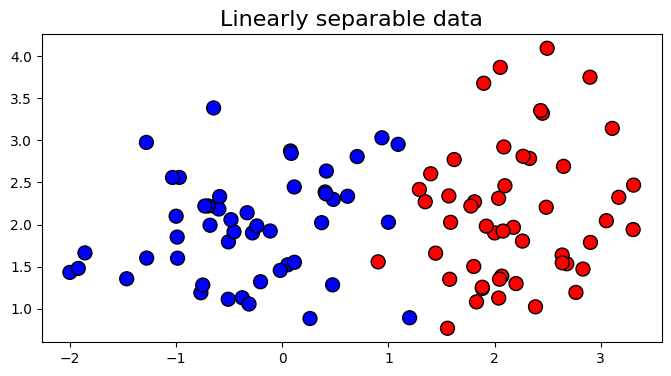

In [11]:
# X, y = make_classification(
#     n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
# )
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=1.2, flip_y=0,
    random_state=1
)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

dataset_linear = linearly_separable

cm_bright = ListedColormap(["#FF0000", "#0000FF"])
plt.figure(figsize=(8, 4))
plt.scatter(
    dataset_linear[0][:, 0], dataset_linear[0][:, 1],
    c=dataset_linear[1], cmap=cm_bright,
    edgecolor='k', s=100
)
plt.title("Linearly separable data", fontsize=16)


In [12]:
def perceptron_train(X_in, y_in, epochs=20, eta=0.01, seed=0):
    rng = np.random.RandomState(seed)
    w = rng.randn(X_in.shape[1], 1)
    history = []
    errors = []
    for epoch in range(epochs):
        m_tot = 0
        for i in range(X_in.shape[0]):
            xi = X_in[i].reshape(-1, 1)
            yi = y_in[i]
            linear_output = np.dot(w.T, xi)[0, 0]
            if yi * linear_output <= 0:
                w += eta * yi * xi
                m_tot += 1
        history.append(w.copy())
        errors.append(m_tot)
        print(f"Epoch {epoch}: Number of misclassified samples={m_tot}, w={w.flatten()}")
    return w, history, errors


In [13]:
X = dataset_linear[0]
y = dataset_linear[1]
y_labels = np.where(y == 0, -1, 1)

use_bias = True
eta = 0.01
epochs = 30

if use_bias:
    X_train = np.hstack((X, np.ones((X.shape[0], 1))))
else:
    X_train = X

w, w_history, error_ = perceptron_train(
    X_train, y_labels, epochs=epochs, eta=eta
)
y_pred = np.sign(np.dot(X_train, w)).flatten()

def decision_values(grid, w, use_bias):
    if use_bias:
        grid_aug = np.hstack((grid, np.ones((grid.shape[0], 1))))
        return np.dot(grid_aug, w)
    return np.dot(grid, w)


Epoch 0: Number of misclassified samples=70, w=[ 0.48735453 -0.26673587  0.67873798]
Epoch 1: Number of misclassified samples=49, w=[-0.0970081  -0.18559972  0.62873798]
Epoch 2: Number of misclassified samples=13, w=[-0.2143509  -0.14470971  0.59873798]
Epoch 3: Number of misclassified samples=8, w=[-0.26450052 -0.11680364  0.57873798]
Epoch 4: Number of misclassified samples=5, w=[-0.28456494 -0.09373773  0.56873798]
Epoch 5: Number of misclassified samples=5, w=[-0.30462935 -0.07067183  0.55873798]
Epoch 6: Number of misclassified samples=3, w=[-0.31830508 -0.06440284  0.54873798]
Epoch 7: Number of misclassified samples=3, w=[-0.33198081 -0.05813385  0.53873798]
Epoch 8: Number of misclassified samples=2, w=[-0.33009684 -0.04418462  0.53873798]
Epoch 9: Number of misclassified samples=4, w=[-0.33174198 -0.02410622  0.53873798]
Epoch 10: Number of misclassified samples=3, w=[-0.34276745 -0.03432332  0.52873798]
Epoch 11: Number of misclassified samples=3, w=[-0.35379291 -0.04454042 

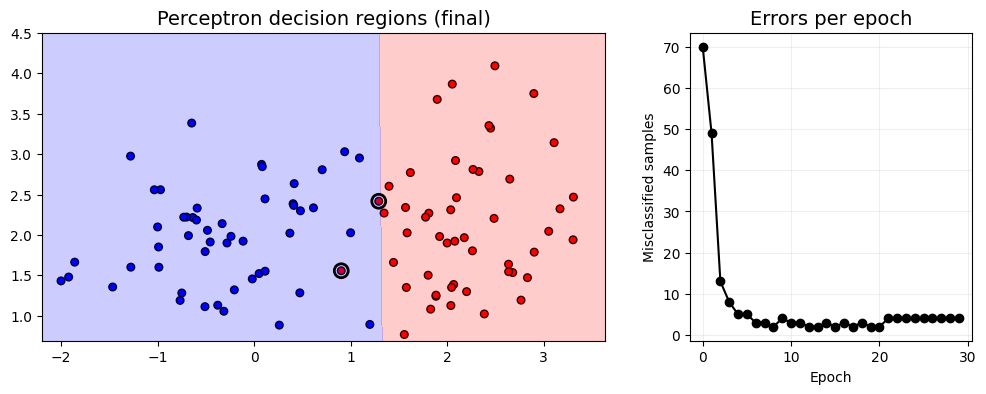

In [14]:
x1 = np.linspace(X[:, 0].min() * 1.1, X[:, 0].max() * 1.1, 200)
x2 = np.linspace(X[:, 1].min() * 0.9, X[:, 1].max() * 1.1, 200)
x1_x2 = np.meshgrid(x1, x2)
X12_grid = np.c_[x1_x2[0].ravel(), x1_x2[1].ravel()]
linear_output = decision_values(X12_grid, w, use_bias)

fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"width_ratios": [2, 1]})

ax_left.scatter(X[:, 0], X[:, 1], c=y_labels, s=30, cmap=cm_bright, edgecolors="k")
ax_left.contourf(
    x1_x2[0],
    x1_x2[1],
    linear_output.reshape(x1_x2[0].shape),
    levels=[-1e5, 0, 1e5],
    alpha=0.2,
    colors=["red", "blue"],
)

mis_idx = np.where(y_labels != y_pred)[0]
if mis_idx.size:
    ax_left.scatter(
        X[mis_idx, 0], X[mis_idx, 1],
        c="none", edgecolors="k", s=100, linewidths=2, marker="o"
    )

ax_left.set_title("Perceptron decision regions (final)", fontsize=14)

ax_right.plot(range(len(error_)), error_, marker="o", color="k")
ax_right.set_xlabel("Epoch")
ax_right.set_ylabel("Misclassified samples")
ax_right.set_title("Errors per epoch", fontsize=14)
ax_right.grid(True, alpha=0.2)


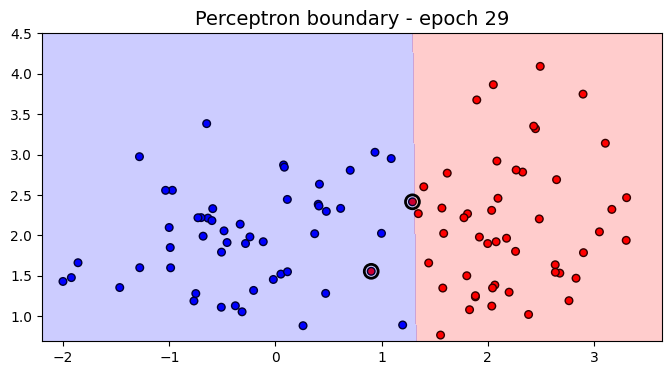

In [18]:
fig, ax_left = plt.subplots(figsize=(8, 4))
ax_left.scatter(X[:, 0], X[:, 1], c=y_labels, s=30, cmap=cm_bright, edgecolors="k")

x_min, x_max = X[:, 0].min() * 1.1, X[:, 0].max() * 1.1
y_min, y_max = X[:, 1].min() * 0.9, X[:, 1].max() * 1.1
ax_left.set_xlim(x_min, x_max)
ax_left.set_ylim(y_min, y_max)

x1 = np.linspace(x_min, x_max, 200)
x2 = np.linspace(y_min, y_max, 200)
x1_x2 = np.meshgrid(x1, x2)
X12_grid = np.c_[x1_x2[0].ravel(), x1_x2[1].ravel()]

line, = ax_left.plot([], [], "k-", linewidth=2)
contour = None
mis_scatter = None

def line_from_w(w):
    if use_bias:
        w0, w1, b = w.flatten()
    else:
        w0, w1 = w.flatten()
        b = 0.0
    if abs(w1) < 1e-12:
        x_vert = -b / w0 if abs(w0) > 1e-12 else 0.0
        return np.array([x_vert, x_vert]), np.array([y_min, y_max])
    x_line = np.array([x_min, x_max])
    y_line = -(w0 * x_line + b) / w1
    return x_line, y_line

def init():
    line.set_data([], [])
    return (line,)

def update(frame):
    global contour, mis_scatter
    w_frame = w_history[frame]
    x_line, y_line = line_from_w(w_frame)
    line.set_data(x_line, y_line)

    linear_output = decision_values(X12_grid, w_frame, use_bias)
    if contour is not None:
        contour.remove()
    contour = ax_left.contourf(
        x1_x2[0],
        x1_x2[1],
        linear_output.reshape(x1_x2[0].shape),
        levels=[-1e5, 0, 1e5],
        alpha=0.2,
        colors=["red", "blue"],
    )

    y_pred_frame = np.sign(np.dot(X_train, w_frame)).flatten()
    mis_idx = np.where(y_labels != y_pred_frame)[0]
    if mis_scatter is not None:
        mis_scatter.remove()
        mis_scatter = None
    if mis_idx.size:
        mis_scatter = ax_left.scatter(
            X[mis_idx, 0], X[mis_idx, 1],
            c="none", edgecolors="k", s=100, linewidths=2, marker="o"
        )

    ax_left.set_title(f"Perceptron boundary - epoch {frame}", fontsize=14)
    return (line,)

ani_line = animation.FuncAnimation(
    fig, update, frames=len(w_history), init_func=init, interval=300, blit=False
)
HTML(ani_line.to_jshtml())
